In [12]:
import mediapipe as mp
import cv2
from dollarpy import Recognizer, Template, Point
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [13]:
templates = []
sub_templates = []

In [14]:
def getPoints(videoURL, label):
    cap = cv2.VideoCapture(videoURL)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5, model_complexity=2) as holistic:
        points = []
        right_wrist = []
        right_index = []
        right_pinky = []

        m_right_index = []
        m_right_wrist = []
        m_right_pinky = []

        while cap.isOpened():
            ret, frame = cap.read()
            if ret != True:
                break
            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                # for detection
                results = holistic.process(image)

                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                try:
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist = []
                    for lnd in pose:
                        if (index in [16, 18, 20]):
                            newlist.append(lnd)
                        index += 1
                    right_wrist.append(Point(newlist[0].x, newlist[0].y, 2))
                    right_pinky.append(Point(newlist[1].x, newlist[1].y, 4))
                    right_index.append(Point(newlist[2].x, newlist[2].y, 3))

                    m_right_wrist.append((newlist[0].x, newlist[0].y))
                    m_right_pinky.append((newlist[1].x, newlist[1].y))
                    m_right_index.append((newlist[2].x, newlist[2].y))

                    # to get all values of x,y, and z in the newlist and flatten it(put it in 1 dimension)
                    # pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility]
                    #                           for landmark in newlist]).flatten())

                except:
                    pass

                if cv2.waitKey(1) == 27:
                    break

    cap.release()
    cv2.destroyAllWindows()
    points = right_wrist + right_index + right_pinky
    print(label)
    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    plt.gca().invert_yaxis()

    plt.show()
    return points

In [15]:
def getPointsLive():
    cap = cv2.VideoCapture(0)
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.7) as holistic:
        points = []
        right_wrist = []
        right_index = []
        right_pinky = []

        m_right_index = []
        m_right_wrist = []
        m_right_pinky = []
        while cap.isOpened():
            ret, frame = cap.read()
            if ret != True:
                break
            if ret == True:
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                # for detection
                results = holistic.process(image)

                image.flags.writeable = True
                image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

                mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                          mp_drawing.DrawingSpec(
                                              color=(80, 22, 10), thickness=2, circle_radius=4),
                                          mp_drawing.DrawingSpec(
                                              color=(80, 44, 121), thickness=2, circle_radius=2)
                                          )

                try:
                    pose = results.pose_landmarks.landmark
                    index = 0
                    newlist = []
                    for lnd in pose:
                        if (index in [16, 18, 20]):
                            newlist.append(lnd)
                        index += 1
                    right_wrist.append(Point(newlist[0].x, newlist[0].y, 2))
                    right_pinky.append(Point(newlist[1].x, newlist[1].y, 4))
                    right_index.append(Point(newlist[2].x, newlist[2].y, 3))

                    m_right_wrist.append((newlist[0].x, newlist[0].y))
                    m_right_pinky.append((newlist[1].x, newlist[1].y))
                    m_right_index.append((newlist[2].x, newlist[2].y))

                    # to get all values of x,y, and z in the newlist and flatten it(put it in 1 dimension)
                    # pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility]
                    #                           for landmark in newlist]).flatten())

                except:
                    pass

            cv2.imshow("123", image)
            if cv2.waitKey(1) == 27:
                break

    cap.release()
    cv2.destroyAllWindows()
    points = right_wrist + right_index + right_pinky

    xs, ys = zip(*m_right_wrist)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_index)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')
    xs, ys = zip(*m_right_pinky)
    plt.plot(xs, ys, 'o')
    plt.plot(xs, ys, '-')

    plt.gca().invert_yaxis()

    plt.show()
    return points

right


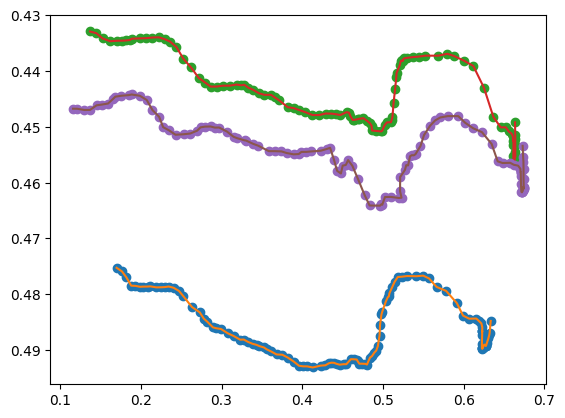

left


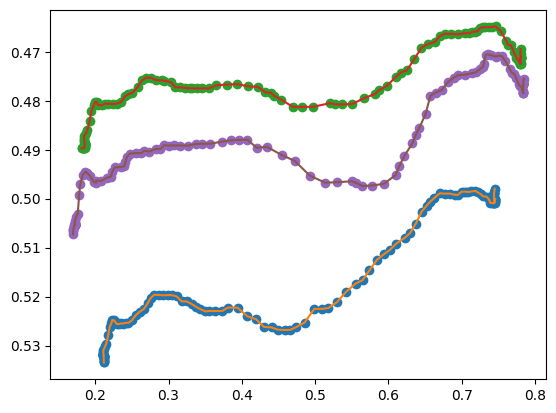

In [16]:
# training
vid = "C:\\Users\\ziads\\Documents\\MSA\\Sem 7\\CS484\\Project\Main\\vids\\slowright-right.mp4"
points = getPoints(vid, "right")
tmpl_2 = Template('right', points)
templates.append(tmpl_2)


vid = "C:\\Users\\ziads\\Documents\\MSA\\Sem 7\\CS484\\Project\\Main\\vids\\slowright-left.mp4"
points = getPoints(vid, "left")
tmpl_2 = Template('left', points)
templates.append(tmpl_2)

In [6]:
import socket
import threading


def send(conn, data):
    msg = bytes(data, 'utf-8')
    print(msg)
    conn.send(msg)

In [7]:
mySocket = socket.socket()
mySocket.bind(('localhost', 3000))
mySocket.listen()
conn, addr = mySocket.accept()
send_thread = threading.Thread(target=send, args=(conn, ''))
send_thread.start()

b''


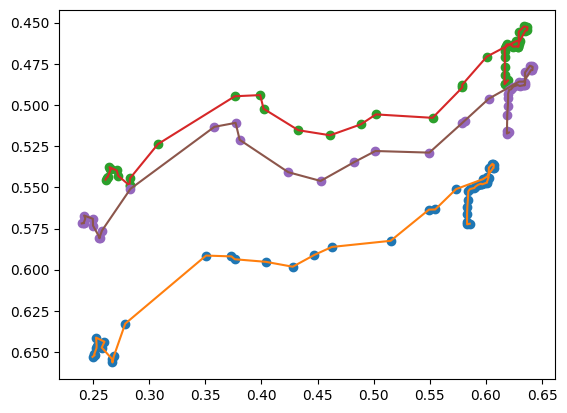

[(0.5855215787887573, 0.5720942616462708), stroke 2, (0.5831958055496216, 0.5724763870239258), stroke 2, (0.5831418037414551, 0.5713053345680237), stroke 2, (0.5831691026687622, 0.5661186575889587), stroke 2, (0.5833903551101685, 0.5617712140083313), stroke 2, (0.583830714225769, 0.5579047799110413), stroke 2, (0.584243655204773, 0.5524343252182007), stroke 2, (0.585769534111023, 0.5510446429252625), stroke 2, (0.5896638631820679, 0.5503723621368408), stroke 2, (0.5904577970504761, 0.5496237277984619), stroke 2, (0.5928995609283447, 0.5484459400177002), stroke 2, (0.595697283744812, 0.5478004813194275), stroke 2, (0.5957686901092529, 0.5480162501335144), stroke 2, (0.5967061519622803, 0.5481624007225037), stroke 2, (0.5993412733078003, 0.5474742650985718), stroke 2, (0.6010167002677917, 0.5470960736274719), stroke 2, (0.6008743643760681, 0.5467188954353333), stroke 2, (0.6022859215736389, 0.5440486669540405), stroke 2, (0.6025559306144714, 0.5381020903587341), stroke 2, (0.605734527111

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [19]:
# testing
points = getPointsLive()
tmpl = Template('', points)
# templates.append(tmpl")
print(points)
recognizer = Recognizer(templates)
result = recognizer.recognize(points)
if result[0] != None:
    if result[0] == 'right':
        send(conn, '0')
    if result[0] == 'left':
        send(conn, '1')
print(result)

In [ ]:

var1 = "1"
# while True:
#   if var1 == 0:
#      send(conn, var1)
#     var1 = 99
# if var1 == 1:
#   send(conn,var1)
#  var1 = 99'''

In [ ]:
send(conn, var1)

In [ ]:
send_thread.join()
mySocket.close()